<a href="https://colab.research.google.com/github/areegtarek/quantium-virtual-program/blob/main/Task1_Data_preparation_and_customer_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#by Areeg tarek

# **Data preparation and customer analytics**

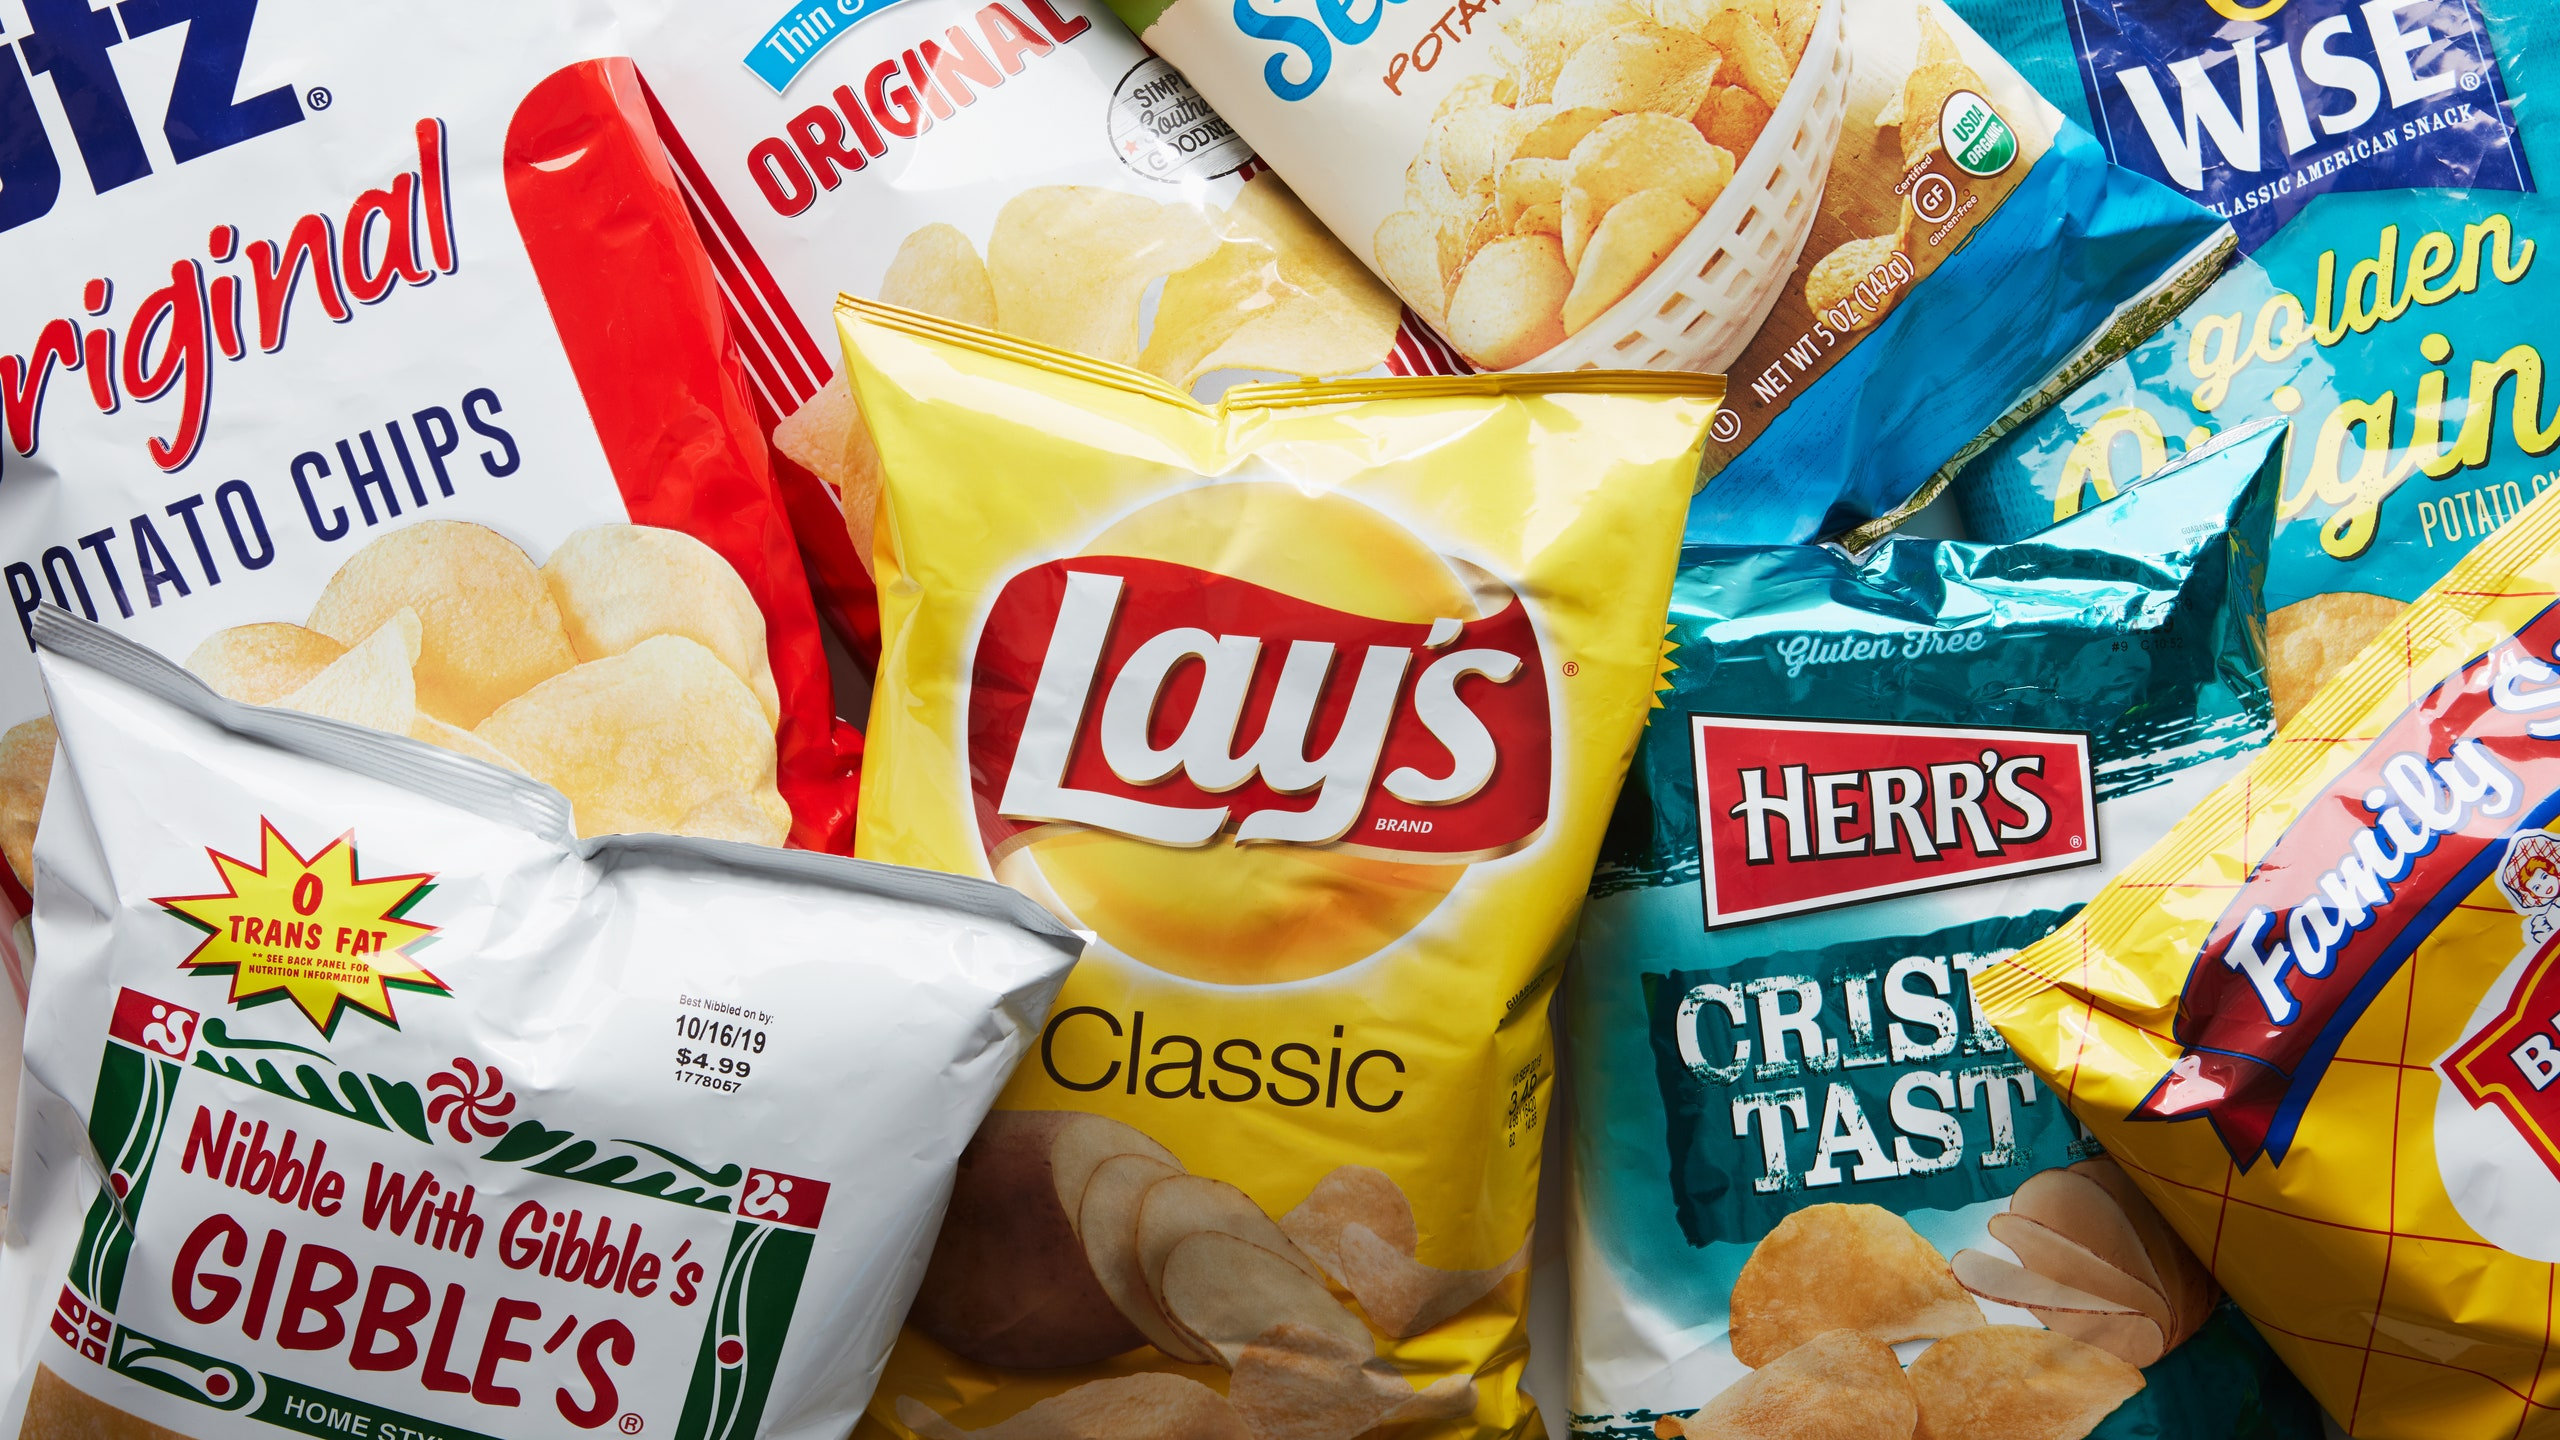

# **Introduction**

Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  



    1.Explore transaction data and produce insights on chips products
    2.Analyse different customer segments and their contribution to chip sales
    3.Investigate which brand and packet size customers prefer







# **Goal:**

To analyse the data to understand the current purchasing trends and behaviours, in particular to customer segments and chip purchasing behaviour.

**Tasks:**

    1.Create and Interpret High level summaries
    2.Outlier detection and removal
    3.Checking data format and correction
    4.Feature engg
      extra features such as packs size and brand name
    5.Metrics: consider what metrics will help describe customers' purchasing behaviour
       who spends on chips
       what drives spends for each customer segment

You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment. Remember our end goal is to form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure your insights can have a commercial application.

# **Data Description**

This data is provided courtesy of Quantium via InsideSherpa's Data Analytics Virtual Experience Program. It contains customer segment data as well as customer transaction data on chips purchase
# **QVI_purchase_behaviour (customerData)**

**LYLTY_CARD_NBR** loyalty card number	

**LIFESTAGE** There are 7 clusters  (YOUNG SINGLES/COUPLES,	YOUNG FAMILIES,OLDER SINGLES/COUPLES,MIDAGE SINGLES/COUPLES)

**PREMIUM_CUSTOMER** premium customer (Premium,Mainstream,Budget)


# **QVI_transaction_data (transactionData)**

**DATE** date of transaction in integer format of excel 

**STORE_NBR** store number

**LYLTY_CARD_NBR** loyalty card number
  
**TXN_ID** transaction id
    
**PROD_NBR** associated product number
      
**PROD_NAME** product name
        
**PROD_QTY** quantity
          
**TOT_SALES** total sales amount


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re

In [ ]:
# Importing the datasets
customerData = pd.read_csv("QVI_purchase_behaviour.csv")

In [ ]:
transactionData= pd.read_csv("Transactions.csv")

In [ ]:
customerData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
transactionData.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [ ]:
customerData.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Here in transaction dataframe dates are given in integer format of excel starting from 01-01-1990. 

Converting them into standard DateTime format

In [ ]:
#passing errors=’ignore’ will return the original input instead of raising any exception.
#Passing errors=’coerce’ will force an out-of-bounds date to NaT, in addition to forcing non-dates (or non-parseable dates) to NaT.
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'],errors='coerce',unit='d',origin='1900-01-01')

In [ ]:
transactionData['DATE'].head()

0   2018-10-19
1   2019-05-16
2   2019-05-22
3   2018-08-19
4   2018-08-20
Name: DATE, dtype: datetime64[ns]

In [ ]:
transactionData["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [ ]:
transactionData['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [ ]:
transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].str.extract("(\d+)")
transactionData['PACK_SIZE'] = pd.to_numeric(transactionData['PACK_SIZE'])

In [ ]:
transactionData['PROD_BRAND']= transactionData['PROD_NAME'].apply(lambda x:x.split()[0])

In [ ]:
# Essentialy, words like Dorito/Doritos, Smith/Smiths, Grain/GrnWves etc. are same
# we need to correct these
# Some of the names like Burger need complete name for better understanding

transactionData.PROD_BRAND.value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3185
Doritos       24962
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Old            9324
Pringles      25102
RRD           11894
Red            5885
Smith          2963
Smiths        28860
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     4437
Name: PROD_BRAND, dtype: int64

In [ ]:
replacements = {'Dorito':'Doritos', 'Grain':'GrnWves', 'Infzns':'Infuzions', 'Smiths':'Smith', 'Snbts':'Sunbites',\
                'Burger':'Burger Rings', 'French': 'French Fries', 'Natural': 'Natural Chip Co', 'Old':'Old El Paso', \
                'Red': 'Red Rock Deli', 'RRD': 'Red Rock Deli', 'NCC': 'Natural Chip Co', 'WW': 'Woolworths'}
transactionData.PROD_BRAND.replace(to_replace=replacements, inplace=True)
transactionData.PROD_BRAND.value_counts().sort_index()

Burger Rings        1564
CCs                 4551
Cheetos             2927
Cheezels            4603
Cobs                9693
Doritos            28147
French Fries        1418
GrnWves             7740
Infuzions          14201
Kettle             41288
Natural Chip Co     7469
Old El Paso         9324
Pringles           25102
Red Rock Deli      17779
Smith              31823
Sunbites            3008
Thins              14075
Tostitos            9471
Twisties            9454
Tyrrells            6442
Woolworths         14757
Name: PROD_BRAND, dtype: int64

In [ ]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,PROD_BRAND
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Co
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smith
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smith
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


**No any missing/ null values**

In [ ]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   PACK_SIZE       264836 non-null  int64         
 9   PROD_BRAND      264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 20.2+ MB


# **Remove Outliers**

In [ ]:
transactionData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200,182.427004
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226,64.327196
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000,150.000000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000,170.000000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000,175.000000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


In [ ]:
transactionData[transactionData['PROD_QTY'] > 10].value_counts()

DATE        STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_NAME                         PROD_QTY  TOT_SALES  PACK_SIZE  PROD_BRAND
2019-05-22  226        226000          226210  4         Dorito Corn Chp     Supreme 380g  200       650.0      380        Doritos       1
2018-08-21  226        226000          226201  4         Dorito Corn Chp     Supreme 380g  200       650.0      380        Doritos       1
dtype: int64

In [ ]:
# remove outlier
transactionData= transactionData[transactionData['PROD_QTY'] < 200].reset_index(drop=True)

In [ ]:
transactionData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000


# **purchasing behaviour**

# **who spends on chips**

In [ ]:
dataset=transactionData.merge(customerData, how='left', on='LYLTY_CARD_NBR')
dataset.shape

(264834, 12)

**Its is observed from the graphs that,**

Old and retired people, older families, young and older families buy a lot chips. This observation in coherent with their spendings on chips.
Young and Old families tend to shop more chips then new families. Theory supports this as new families have relatively younger children who still not eat a lot of chips as well as they are more stringent on expenses.

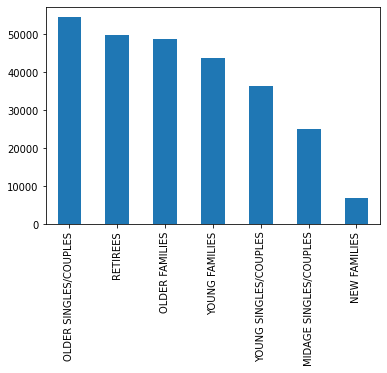

In [ ]:
# checking distribution of LIFESTAGE
dataset['LIFESTAGE'].value_counts().plot(kind='bar')
plt.show()

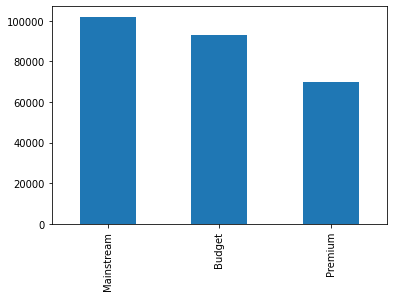

In [ ]:
# checking distribution of PREMIUM CUSTOMER
dataset.PREMIUM_CUSTOMER.value_counts().plot(kind='bar')
plt.show()

we are getting most sales from budget-old families, mainstream-retirees and maintream young/single couples

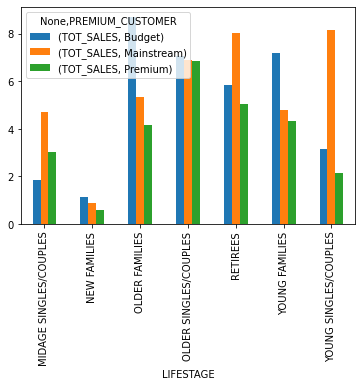

In [ ]:
#how premium our target customers are
total = dataset.TOT_SALES.sum()
pvt = pd.pivot_table(dataset, index=['LIFESTAGE'],columns=['PREMIUM_CUSTOMER'], values=['TOT_SALES'],aggfunc='sum')
pvt=pvt.applymap(lambda x: round(x*100/total,2))
pvt.plot(kind='bar', stacked=False, )